In [1]:
# Import library for dataframes.
import pandas as pd

In [2]:
import torchaudio

ModuleNotFoundError: No module named 'torchaudio'

In [10]:
# Read the iris flowers data from the website.
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(data,header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Attach the column names to the data.
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [12]:
# view the top 5 rows of the dataset
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Check information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [15]:
# Value counts of the classes
df['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [16]:
# Description of the data
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
# Convert the classes to discrete values
df['classes'] = df['class'].replace('Iris-setosa', 1)
df['classes'] = df['classes'].replace('Iris-versicolor', 2)
df['classes'] = df['classes'].replace('Iris-virginica', 3)
df.head()
np.where(df)
# df['class']=np.where(df['class'] =='Iris-setosa', 1, 0) # replace the classes in the dataset for a binary situation
                                                        #or a multi-class one-vs-rest situation.

,sepal length,sepal width,petal length,petal width,class,class1,classes
0,5.1,3.5,1.4,0.2,Iris-setosa,True,1
1,4.9,3.0,1.4,0.2,Iris-setosa,True,1
2,4.7,3.2,1.3,0.2,Iris-setosa,True,1
3,4.6,3.1,1.5,0.2,Iris-setosa,True,1
4,5.0,3.6,1.4,0.2,Iris-setosa,True,1


In [61]:
# verify the value counts
df.classes.value_counts()

3    50
2    50
1    50
Name: classes, dtype: int64

In [55]:
df.head()

,sepal length,sepal width,petal length,petal width,class,class1,classes
0,5.1,3.5,1.4,0.2,Iris-setosa,True,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,True,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,True,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,True,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,True,Iris-setosa


In [20]:
# Import numeric python library
import numpy as np

In [64]:
# Create a csv of the file
df.to_csv('etcs.csv', index=False)

In [65]:
df2 = pd.read_csv('etcs.csv', index_col=None)

In [66]:
df2.head()

,sepal length,sepal width,petal length,petal width,class,class1,classes
0,5.1,3.5,1.4,0.2,Iris-setosa,True,1
1,4.9,3.0,1.4,0.2,Iris-setosa,True,1
2,4.7,3.2,1.3,0.2,Iris-setosa,True,1
3,4.6,3.1,1.5,0.2,Iris-setosa,True,1
4,5.0,3.6,1.4,0.2,Iris-setosa,True,1


In [27]:
# Check the values of the classes
df2['class'].value_counts()

0    100
1     50
Name: class, dtype: int64

In [28]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [75]:
# Instantiate the model using a solver and state the multi-class option and a maximum number of iterations.
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=500)

In [67]:
# Select your features and targets
features = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
labels = df.classes.values

In [68]:
# Verify the shape of your datasets
features.shape, labels.shape

((150, 4), (150,))

In [33]:
# Import train test split for the data, or use sample technique
from sklearn.model_selection import train_test_split

In [69]:
# split your data
Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.25, random_state=35)
# train = df.sample(frac = 0.8, replace= False)
# test = df.drop(train)

In [70]:
# # Check the shape of all datasets
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((112, 4), (38, 4), (112,), (38,))

In [76]:
# Fit the train set
logreg.fit(Xtrain, ytrain)
# Predict the test set
ypred = logreg.predict(Xtest)

In [77]:
# Check the predicted values
ypred

array([2, 2, 3, 2, 1, 3, 3, 2, 2, 1, 2, 3, 1, 3, 1, 3, 2, 1, 1, 1, 2, 2,
       3, 2, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 2, 3, 1, 3])

In [38]:
# Import classification report, classification report and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
# Check the accuracy of prediction on the test set.
print('model accuracy =: ', accuracy_score(ypred, ytest))

model accuracy =:  0.9473684210526315


In [80]:
# Check the train accuracy
print('train model accuracy =: ', logreg.score(Xtrain, ytrain))

train model accuracy =:  0.9732142857142857


In [79]:
# Check the test accuracy
print('test model accuracy =: ', logreg.score(Xtest, ytest))

test model accuracy =:  0.9473684210526315


In [81]:
# Print a classification report of the precision, recall and f1-score
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.92      0.92      0.92        12
           3       0.92      0.92      0.92        12

   micro avg       0.95      0.95      0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [85]:
# Print a confusion matrix of the predicted classes
print(confusion_matrix(ypred, ytest, labels = [1,2,3]))

[[14  0  0]
 [ 0 11  1]
 [ 0  1 11]]


In [86]:
# Predict the probabilities of the test set
ypred_proba = logreg.predict_proba(Xtest)

In [87]:
# View the probabilities. NOTE: we get 2 probabilities P(y=0|x,w) and P(y=1|x,w)
ypred_proba

array([[2.62121729e-02, 9.15343539e-01, 5.84442878e-02],
       [2.00895398e-02, 8.67403988e-01, 1.12506473e-01],
       [2.59323270e-05, 4.88570357e-02, 9.51117032e-01],
       [1.13153042e-03, 6.17671375e-01, 3.81197095e-01],
       [9.83070102e-01, 1.69298240e-02, 7.37756644e-08],
       [9.47682824e-06, 2.26117955e-02, 9.77378728e-01],
       [4.20483480e-04, 3.03139802e-01, 6.96439714e-01],
       [8.54241155e-02, 8.98929315e-01, 1.56465698e-02],
       [7.63684096e-03, 7.82769064e-01, 2.09594095e-01],
       [9.72804746e-01, 2.71951415e-02, 1.12898847e-07],
       [1.34536810e-02, 7.31540903e-01, 2.55005416e-01],
       [8.77338558e-06, 1.35847843e-02, 9.86406442e-01],
       [9.77399444e-01, 2.26004324e-02, 1.23104840e-07],
       [1.23675263e-05, 2.52028250e-02, 9.74784807e-01],
       [9.38168489e-01, 6.18311068e-02, 4.03792664e-07],
       [4.64233944e-04, 2.08385573e-01, 7.91150193e-01],
       [3.22765166e-02, 9.52441822e-01, 1.52816611e-02],
       [9.79134865e-01, 2.08650

In [45]:
# Select the probability of 1 P(y=1|x,w)
ypred_proba[:,1]

array([2.81208927e-02, 2.28123725e-02, 6.17952014e-04, 3.06572178e-03,
       9.79999735e-01, 5.03508737e-04, 1.69199846e-03, 7.27515962e-02,
       1.10540093e-02, 9.70658121e-01, 1.01939584e-02, 7.60740971e-04,
       9.76271331e-01, 8.63619884e-04, 9.34614956e-01, 1.23336278e-03,
       2.91327579e-02, 9.55799367e-01, 9.72243329e-01, 9.67533885e-01,
       1.34840394e-02, 1.17296238e-02, 5.45480930e-04, 1.23442295e-02,
       9.51158225e-01, 9.67107666e-01, 9.81823546e-01, 3.03294399e-03,
       9.38486833e-01, 3.98738324e-05, 9.68511737e-01, 6.44986906e-03,
       3.52224026e-03, 9.90185724e-01, 2.13105580e-02, 8.21346555e-04,
       9.57114988e-01, 3.75713185e-04])

In [46]:
# Trying to change our threshold or decision boundary to attain better prediction values for binary classes.
# Note: we cannot confidently change threshold values for a multiclass problem, as we may not be able to evaluate the 
# right decision boundaries by ourselves
thresh = 0.7
yup = []
for i in ypred_proba[:,1]:
    if i >= thresh:
        i = 1
        yup.append(i)
    else:
        i = 0
        yup.append(i)

In [47]:
# View the new predictions
yup

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0]

In [89]:
df.head()

,sepal length,sepal width,petal length,petal width,class,class1,classes
0,5.1,3.5,1.4,0.2,Iris-setosa,True,1
1,4.9,3.0,1.4,0.2,Iris-setosa,True,1
2,4.7,3.2,1.3,0.2,Iris-setosa,True,1
3,4.6,3.1,1.5,0.2,Iris-setosa,True,1
4,5.0,3.6,1.4,0.2,Iris-setosa,True,1


In [90]:
# Some plotting functions
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline

Text(0.5, 0, 'petal length')

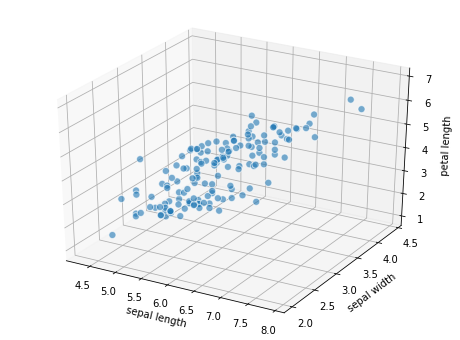

In [99]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['sepal length']
ys = df['sepal width']
zs = df['petal length']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')

In [104]:
import itertools

In [ ]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual Label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[14  0  0]
 [ 0 11  1]
 [ 0  1 11]]


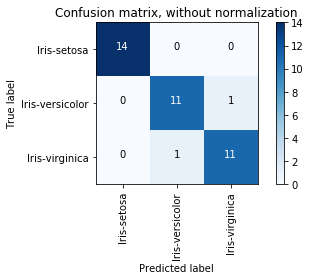

In [107]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, ypred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',],
                      title='Confusion matrix, without normalization')